In [12]:
!pip install rho_plus

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp

# if you want dark mode, use is_dark=True instead
theme, cs = rp.mpl_setup(is_dark=False)

# context='talk' makes the text big so it's easy to see
# for your work, you may want to set this to 'notebook' instead
sns.set_context('talk')

In [78]:
feats = pd.read_csv('custom_features.csv', index_col=0)


X = feats
# X = pd.read_feather('cfid_features.feather')                               # all of the Jarvis features
# X = pd.concat([pd.read_feather('cfid_features.feather'), feats], axis=1)   # the combination of the two

targets = pd.read_csv('targets.csv', index_col=0)
targets = targets.set_index('CSD_code')
targets['eta'] = targets.eval('(HOMO_Energy + LUMO_Energy) / 2')

################ Multiple target columns exist.
# Try different columns to see what happens.
# If you want to see what your options are:
# print(targets.columns)
y = targets['eta']
################

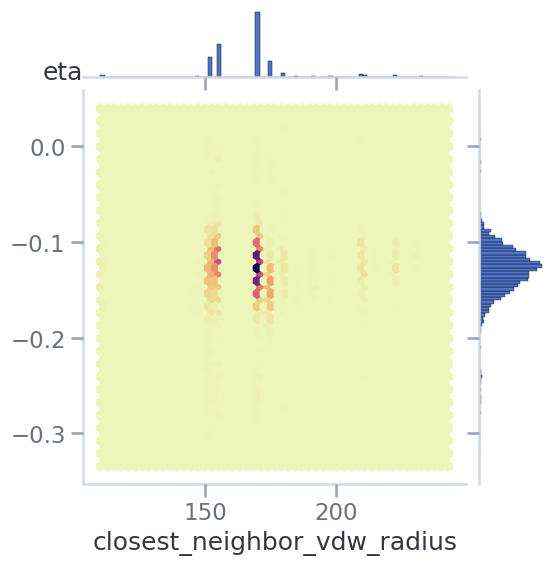

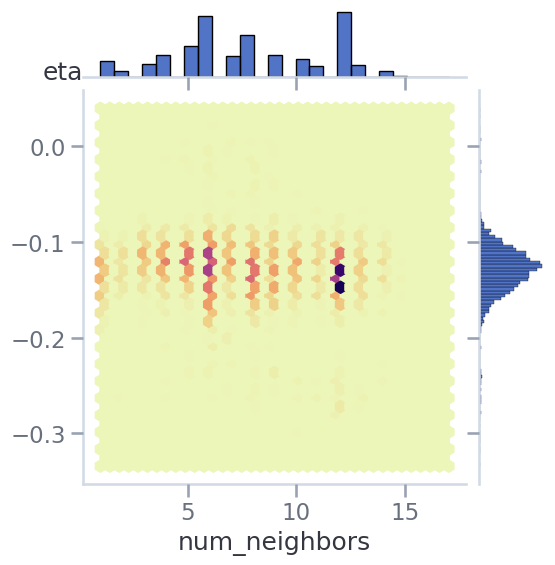

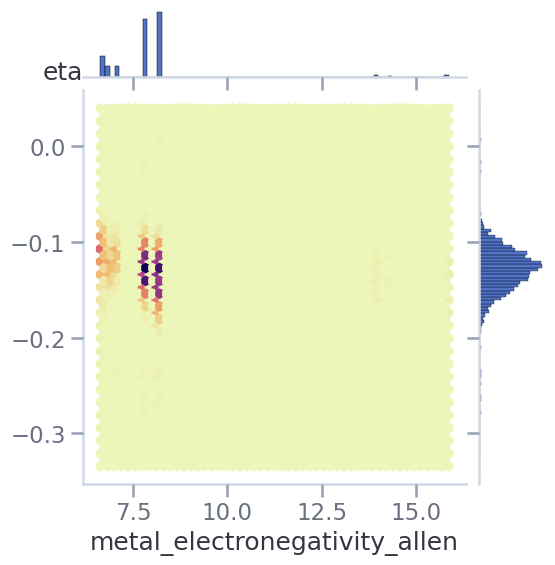

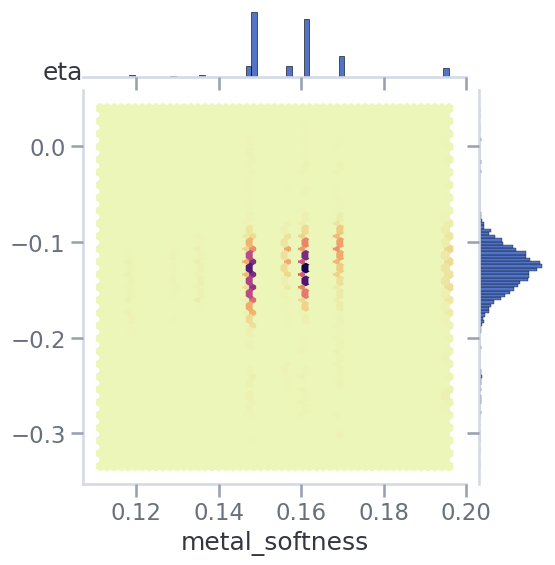

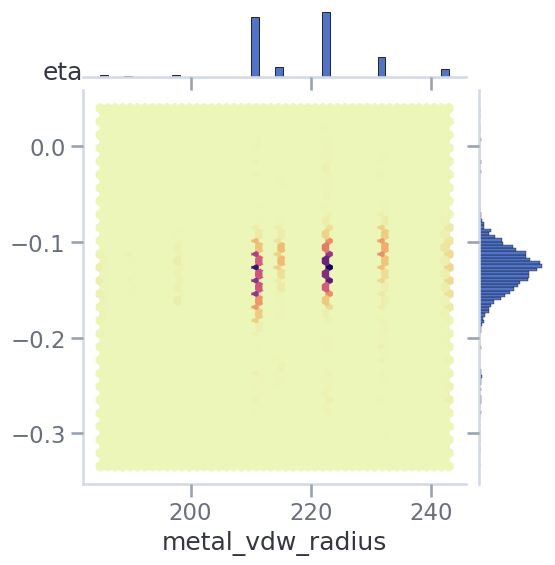

In [59]:
X = feats[[
    ##################### Pick features to use.
    'closest_neighbor_vdw_radius', 
    'num_neighbors', 
    'metal_electronegativity_allen', 
    'metal_softness', 
    'metal_vdw_radius'
    #####################
]]

for col in X.columns:
    sns.jointplot(x=X[col], y=y, kind='hex', cmap='rho_heatmap')
    rp.ylabel_top()

In [61]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    HistGradientBoostingRegressor(interaction_cst='pairwise')
)

yhat = cross_val_predict(pipe, X, y, cv=10)
print('R2 Score:', f'{r2_score(y, yhat):.2%}')

R2 Score: 10.83%


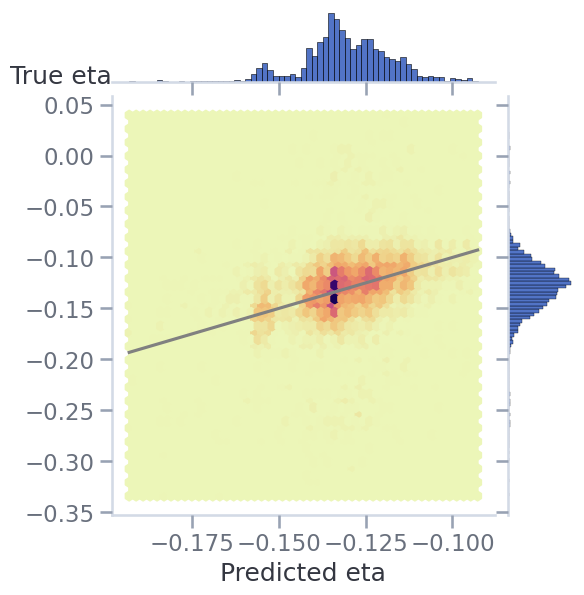

In [62]:
from sklearn.model_selection import cross_val_predict


sns.jointplot(x=yhat, y=y, kind='hex', cmap='rho_heatmap')
plt.xlabel(f'Predicted {y.name}')
plt.ylabel(f'True {y.name}')
plt.plot((yhat.min(), yhat.max()), (yhat.min(), yhat.max()), color='gray', scalex=False, scaley=False)
rp.ylabel_top()